In [1282]:
# Load basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Univariate Variable Analysis



In [1283]:
df = pd.read_csv("/home/alireza/Desktop/Data_Train.csv")

In [1284]:
df.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [1285]:
df.shape

(5699, 9)

In [1286]:
df.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [1287]:
df.duplicated().sum()

0

In [1288]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [1289]:
df['Reviews'] = df['Reviews'].str.extract('(\d+\.\d+)').astype(float)
df['Ratings'] = df['Ratings'].str.extract('(\d+)').astype(int)

In [1290]:
df['Year'] = df['Edition'].str.extract(r'(\d{4})').astype(float)
df['Month'] = df['Edition'].str.extract(r'(\w+\s\d{4})')
df['Month'] = df['Month'].str.extract(r'(\w+)')
# df['Edition'] = df['Edition'].str.replace(r'\d{4}', '', regex=True).str.replace(r',–', ',', regex=True).str.strip(',')
df['Edition'] = df['Edition'].str.extract(r'(\w+)')

In [1291]:
df.isna().sum()

Title             0
Author            0
Edition           0
Reviews           0
Ratings           0
Synopsis          0
Genre             0
BookCategory      0
Price             0
Year             20
Month           335
dtype: int64

In [1292]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Year,Month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016.0,Mar
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012.0,Nov
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982.0,Feb
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017.0,Oct
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006.0,Oct


In [1293]:
df['Edition'].unique()

array(['Paperback', 'Hardcover', 'Mass', 'Sheet', 'Flexibound', 'Plastic',
       'Loose', 'Tankobon', 'Perfect', 'Board', 'Cards', 'Spiral',
       'Kannada', 'Product', 'Library', 'German', 'Leather', 'French'],
      dtype=object)

In [1294]:
df[df['Year'].isna()]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Year,Month
169,Long Walk to Freedom: Illustrated Children's e...,Nelson Mandela,Paperback,5.0,2,Long Walk to Freedom by Nelson Mandela is the ...,Action & Adventure (Books),Action & Adventure,418.0,NaN,NaN
235,Alfred's Basic Adult All-in-One Course: Lesson...,Willard A. Palmer,Plastic,3.9,6,Alfred's Basic Adult All-in-One Course is a gr...,Music Books,"Arts, Film & Photography",1453.0,NaN,NaN
582,Fundamentals of Drawing Portraits: A Practical...,Barrington Barber,Paperback,4.0,7,This book is essential for everyone who wants ...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",415.0,NaN,NaN
972,"Cartooning, The Professional Step-by-Step Guid...","Ivan Hissey, Curtis Tappenden",Paperback,3.0,1,A comprehensive and practical guide to drawing...,"Handicrafts, Decorative Arts & Crafts (Books)",Comics & Mangas,445.0,NaN,NaN
1233,Amma Tell Me About Raksha Bandhan!,Bhakti Mathur,Paperback,5.0,1,A promise to love and to protect\nIs sealed by...,Action & Adventure (Books),Action & Adventure,277.0,NaN,NaN
1558,Figure it out for Yourself,James Hadley Chase,Hardcover,5.0,1,Serena Marshland was the fourth richest woman ...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",100.0,NaN,NaN
1605,"An Introduction to Linguistics: Language, Gram...",Syal,Paperback,4.1,29,"This compact and engagingly elegant text, now ...",Engineering,"Language, Linguistics & Writing",399.0,NaN,NaN
1631,Swimming: Swimming Made Easy: Beginner and Exp...,Ace McCloud,Paperback,4.0,1,Are you tired of being a weak swimmer? Do less...,"Swimming, Snorkelling & Diving (Books)",Sports,709.0,NaN,NaN
1643,The Merchant of Venice (Text with Paraphrase) ...,William Shakespeare,Paperback,3.9,58,Introduce the students to William Shakespeare’...,Theater,"Arts, Film & Photography",220.0,NaN,NaN
1769,The Human Face of Big Data,Rick Smolan,Hardcover,5.0,1,The images and stories captured in The Human F...,Computer Science Books,"Computing, Internet & Digital Media",2248.0,NaN,NaN


In [1295]:
df[df['Month'].isna()].head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Year,Month
19,"Introducing Data Science: Big Data, Machine Le...","Davy Cielen, Arno D.B. Meysman, Mohamed Ali",Paperback,4.3,5,Introducing Data Science explains vital data s...,Artificial Intelligence,"Computing, Internet & Digital Media",352.0,2016.0,NaN
35,HANNIBAL RISING,Thomas Harris,Paperback,4.3,8,_________________________ hannibal lecter wasn...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",309.0,2019.0,NaN
44,Daisy Jones and The Six,Taylor Jenkins Reid,Hardcover,4.6,6,picked as < u> one to watch in 2019</u> by <th...,Music Books,Romance,560.0,2019.0,NaN
60,Mastering VBA for Microsoft Office 2016 (SYBEX),Richard Mansfield,Paperback,5.0,1,Mastering VBA for Microsoft Office 2016 helps ...,Programming Languages (Books),"Computing, Internet & Digital Media",743.0,2016.0,NaN
98,Sap Hr Personnel Administration and Recruitmen...,Agrawal P.K,Paperback,5.0,2,SAP is a great software. One needs to fully un...,Business Communication,"Computing, Internet & Digital Media",449.0,2011.0,NaN
112,The Quintessential Quintuplets 3,Negi Haruba,Paperback,5.0,1,Cram session working hard finally feels like i...,Mangas,Comics & Mangas,685.0,2019.0,NaN
113,"Thrills, Skills and Molehills: The Beautiful G...",ChrisMD,Flexibound,5.0,1,What makes the ultimate Sunday League football...,"Children's Games, Toys & Activities (Books)",Sports,427.0,2018.0,NaN
115,Yoga for Runners,Lexie Williamson,Paperback,5.0,5,Yoga for Runners uses yoga postures to both st...,Healthy Living & Wellness (Books),Sports,1453.0,2015.0,NaN
141,Refreshing Mandala - Colouring Book for Adults...,Dreamland Publications,Paperback,4.3,16,"Mandala is a symbol made from circles, squares...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",155.0,2017.0,NaN
143,internet of Things: A Hands-On Approach,"Arsheep Bahga, Vijay Madisetti",Paperback,4.5,35,This book is written as a textbook for educati...,"Computing, Internet & Digital Media (Books)","Computing, Internet & Digital Media",459.0,2015.0,NaN


In [1296]:
df.describe()

,Reviews,Ratings,Price,Year
count,5699.000000,5699.000000,5699.000000,5679.000000
mean,4.292630,29.437445,554.857428,2011.901039
std,0.659072,82.905985,674.363427,7.922444
min,1.000000,1.000000,25.000000,1900.000000
25%,4.000000,2.000000,249.000000,2010.000000
50%,4.400000,6.000000,373.000000,2015.000000
75%,4.800000,21.000000,599.000000,2017.000000
max,5.000000,973.000000,14100.000000,2019.000000


In [1297]:
df['Month'] = df['Month'].fillna("Not Available")
df = df.dropna(subset=['Year'])

In [1298]:
df['Month'].unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', 'Not Available', 'Aug', 'Apr'], dtype=object)

In [1299]:
df.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
Year            0
Month           0
dtype: int64

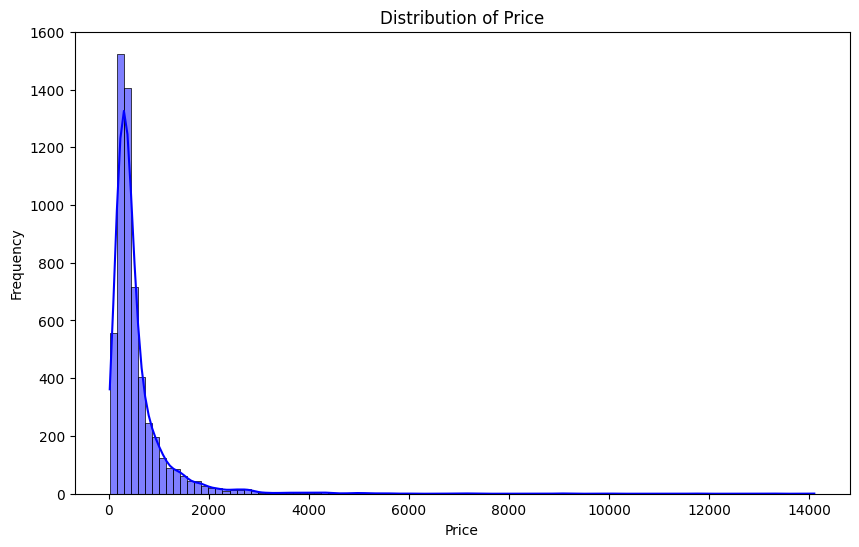

In [1300]:
# Assuming df is your DataFrame and 'price' is the column you want to analyze
price_column = df['Price']

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_column, kde=True, bins=100, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

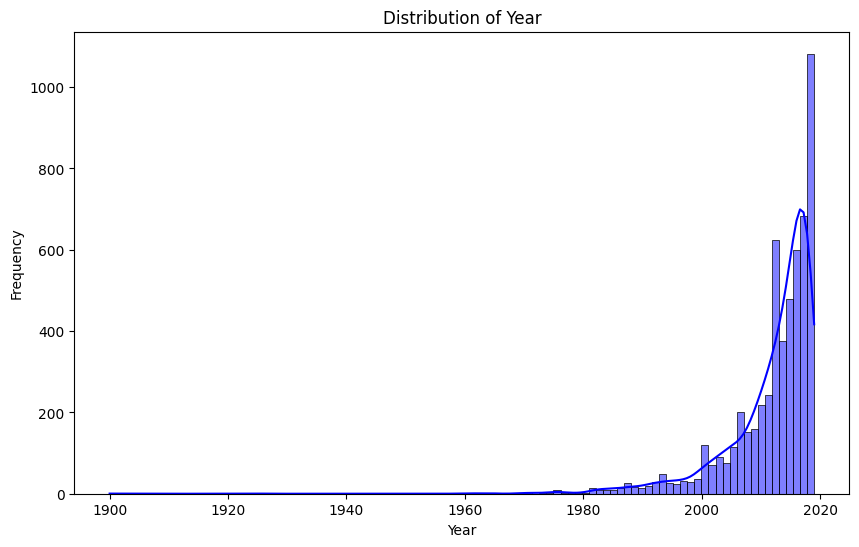

In [1301]:
# Assuming df is your DataFrame and 'price' is the column you want to analyze
price_column = df['Year']

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_column, kde=True, bins=100, color='blue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## Basic Data Analysis



In [1302]:
df['Genre'] = df['Genre'].str.replace(r'\(Books\)$', '', regex=True).str.strip()

In [1303]:
df.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Year,Month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure,Action & Adventure,220.00,2016.0,Mar
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast,"Biographies, Diaries & True Accounts",202.93,2012.0,Nov
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982.0,Feb
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,2017.0,Oct
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006.0,Oct


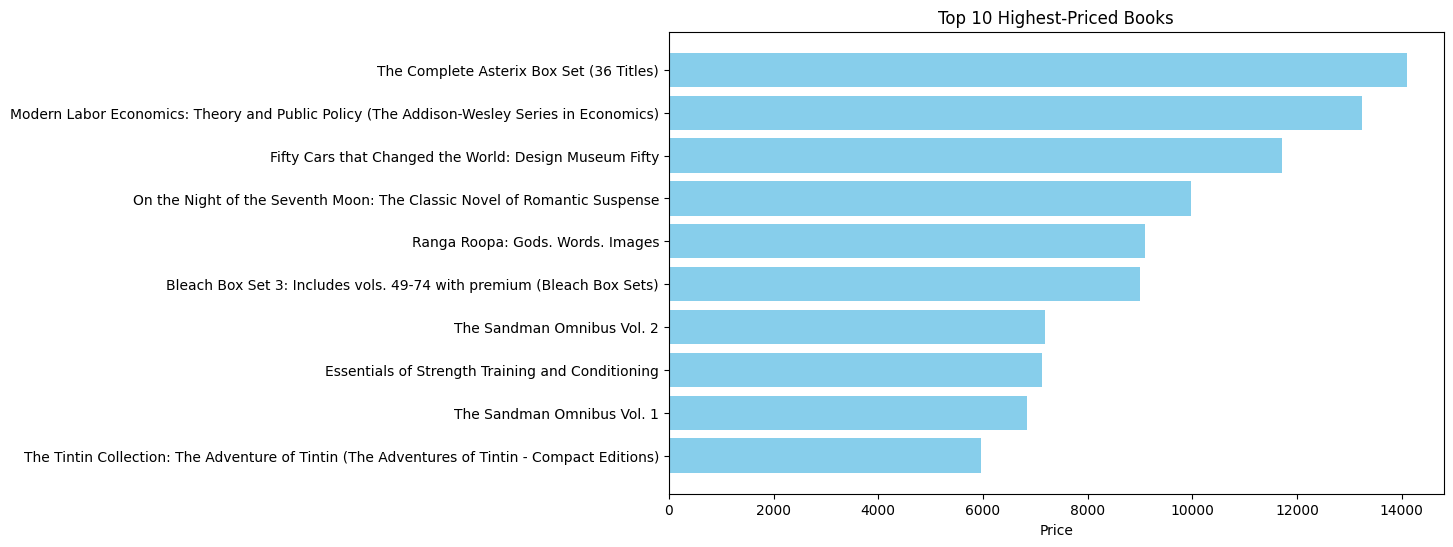

In [1304]:
# Assuming 'Price' is the column representing the book prices
top_10_prices = df.nlargest(10, 'Price')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_prices['Title'], top_10_prices['Price'], color='skyblue')
plt.xlabel('Price')
plt.title('Top 10 Highest-Priced Books')
plt.gca().invert_yaxis()  # To have the highest price at the top
plt.show()


## Feature Engineering



In [1305]:
# Calculate Global Average Rate and Global Average Review
global_average_rate = df["Ratings"].mean()
global_average_review = df["Reviews"].mean()

# Define a function to calculate Bayesian Average
def calculate_bayesian_average(rate, reviews, global_average_rate, global_average_review):
    bayesian_average = ((rate * reviews) + (global_average_rate * global_average_review)) / (reviews + global_average_review)
    return bayesian_average

# Create a new column with Bayesian Average
df["Popularity"] = df.apply(lambda row: calculate_bayesian_average(row["Ratings"], row["Reviews"], global_average_rate, global_average_review), axis=1)


In [1306]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Year,Month,Popularity
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure,Action & Adventure,220.00,2016.0,Mar,19.068295
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast,"Biographies, Diaries & True Accounts",202.93,2012.0,Nov,22.059683
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982.0,Feb,17.038632
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,2017.0,Oct,21.379079
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006.0,Oct,14.110698


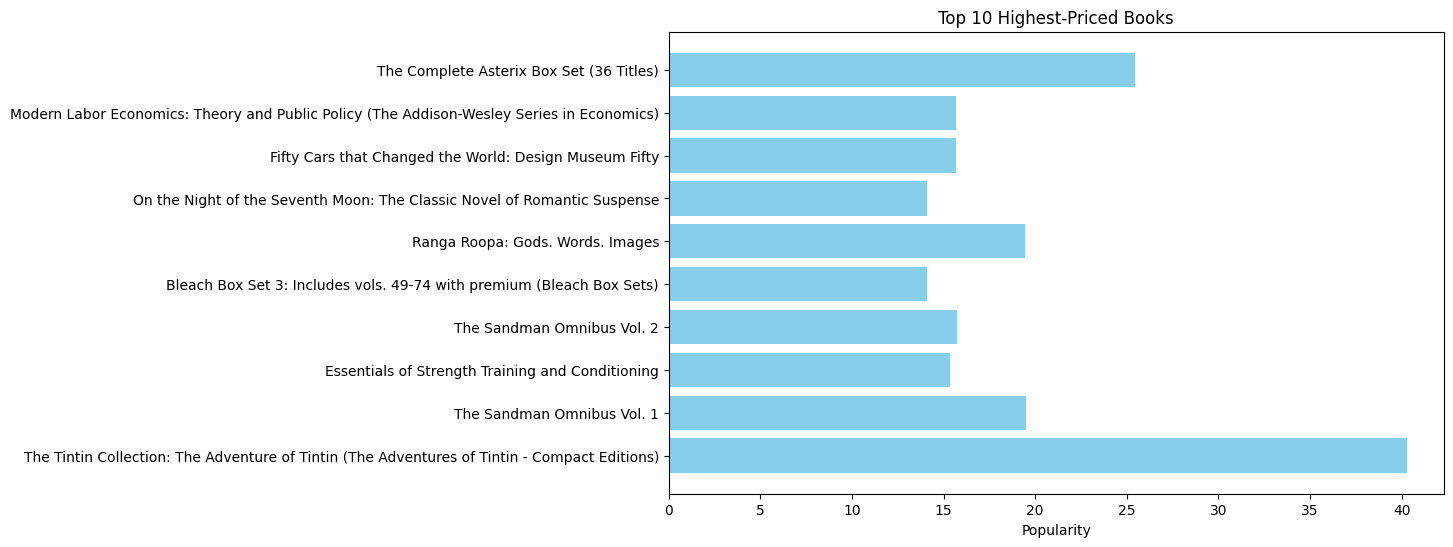

In [1307]:
# Assuming 'Price' is the column representing the book prices
top_10_prices = df.nlargest(10, 'Price')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_prices['Title'], top_10_prices['Popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.title('Top 10 Highest-Priced Books')
plt.gca().invert_yaxis()  # To have the highest price at the top
plt.show()

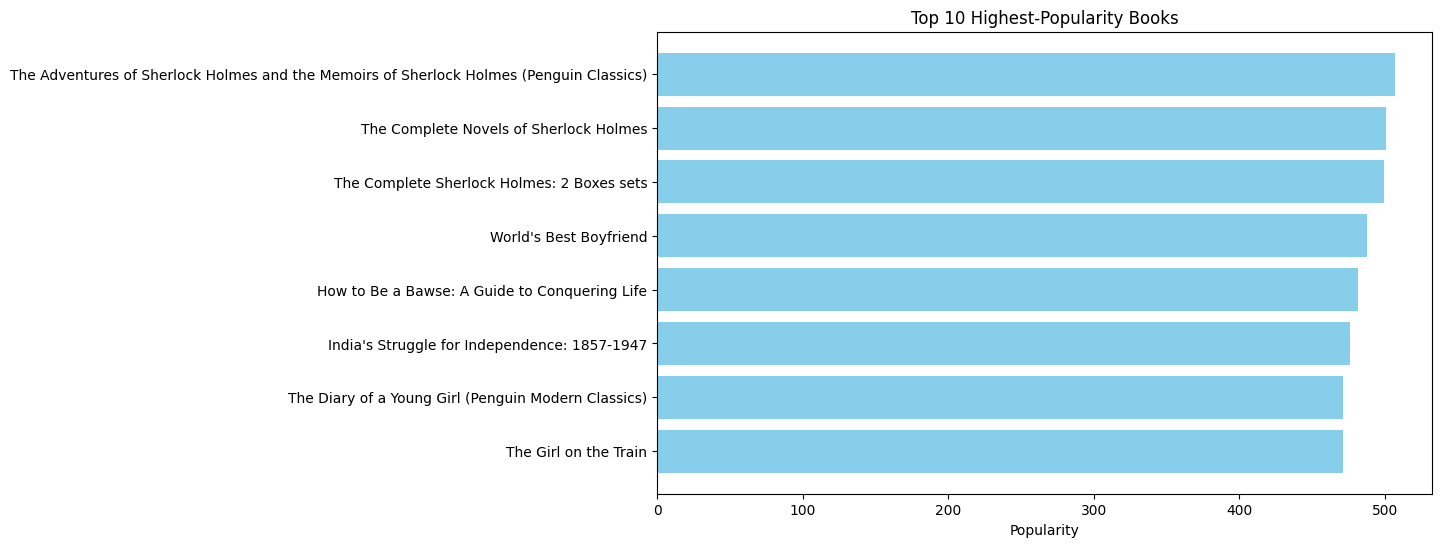

In [1308]:
# Assuming 'Price' is the column representing the book prices
top_10_prices = df.nlargest(10, 'Popularity')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_prices['Title'], top_10_prices['Popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.title('Top 10 Highest-Popularity Books')
plt.gca().invert_yaxis()  # To have the highest price at the top
plt.show()

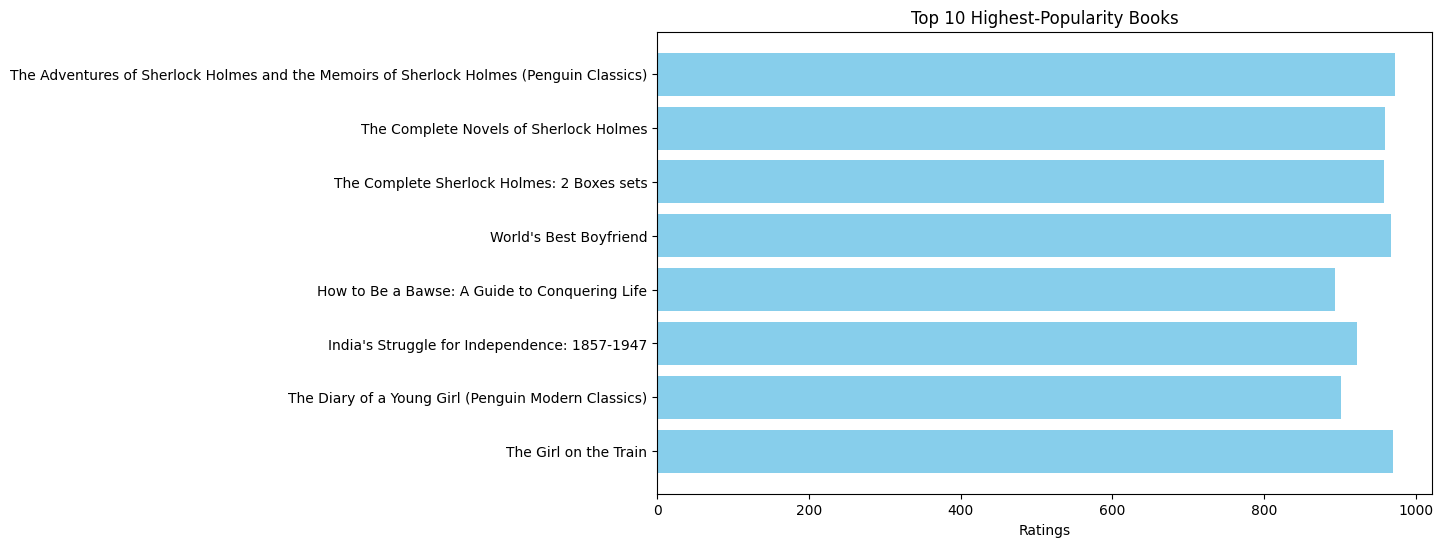

In [1309]:
# Assuming 'Price' is the column representing the book prices
top_10_prices = df.nlargest(10, 'Popularity')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_prices['Title'], top_10_prices['Ratings'], color='skyblue')
plt.xlabel('Ratings')
plt.title('Top 10 Highest-Popularity Books')
plt.gca().invert_yaxis()  # To have the highest price at the top
plt.show()

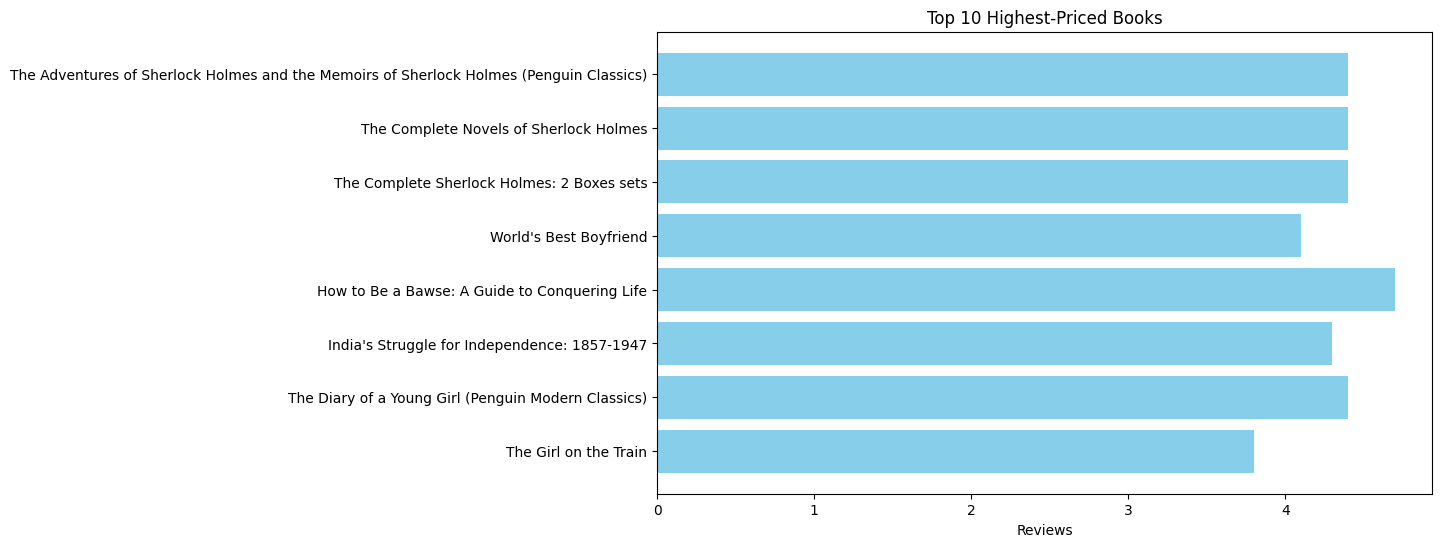

In [1310]:
# Assuming 'Price' is the column representing the book prices
top_10_prices = df.nlargest(10, 'Popularity')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_prices['Title'], top_10_prices['Reviews'], color='skyblue')
plt.xlabel('Reviews')
plt.title('Top 10 Highest-Priced Books')
plt.gca().invert_yaxis()  # To have the highest price at the top
plt.show()

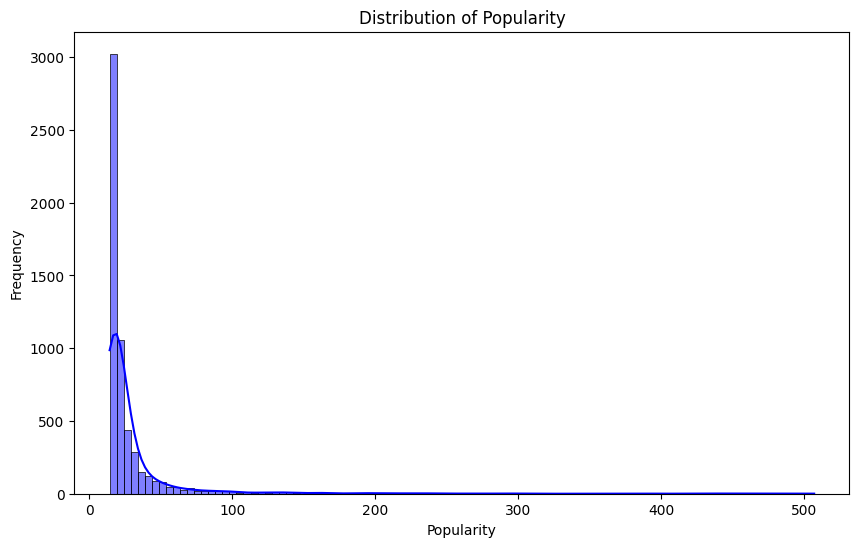

In [1311]:
# Assuming df is your DataFrame and 'price' is the column you want to analyze
price_column = df['Popularity']

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_column, kde=True, bins=100, color='blue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

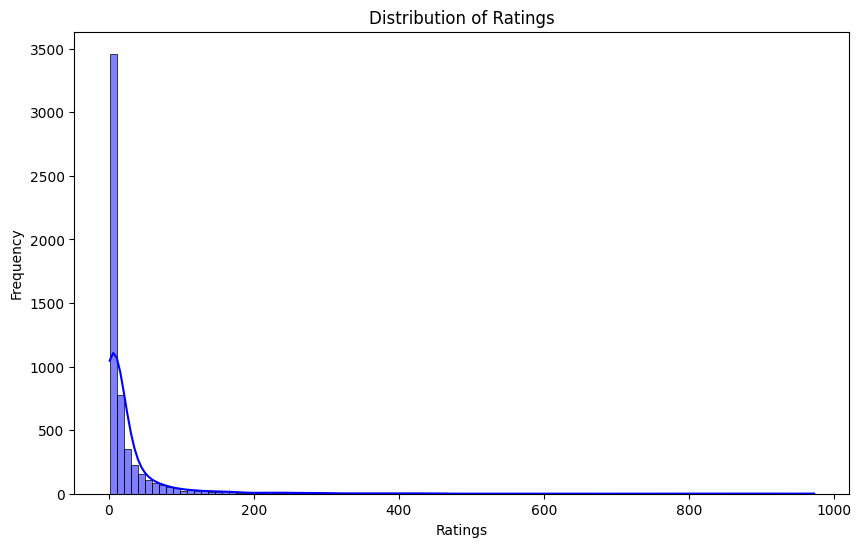

In [1312]:
# Assuming df is your DataFrame and 'price' is the column you want to analyze
price_column = df['Ratings']

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_column, kde=True, bins=100, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

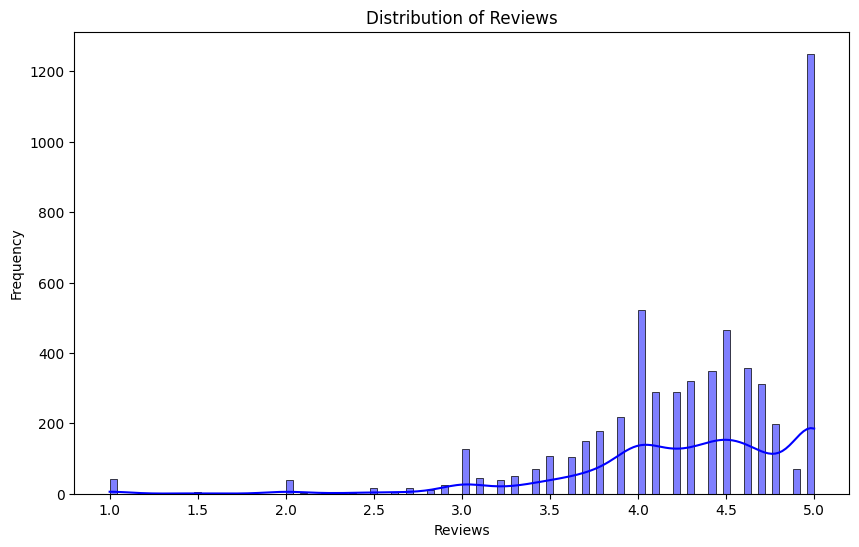

In [1313]:
# Assuming df is your DataFrame and 'price' is the column you want to analyze
price_column = df['Reviews']

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_column, kde=True, bins=100, color='blue')
plt.title('Distribution of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_46115/1769742911.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_authors.values, y=top_10_authors.index, palette='viridis')


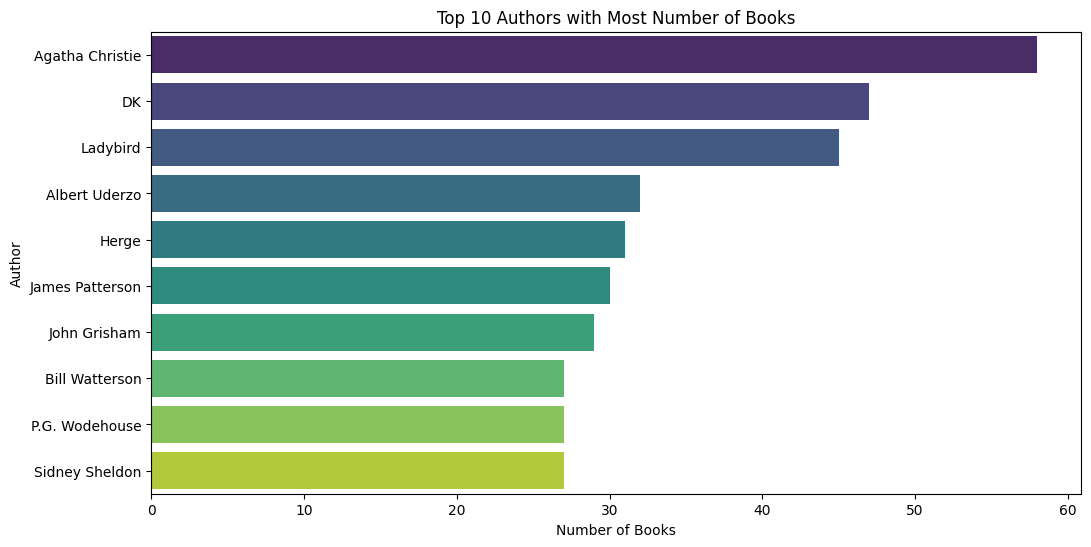

In [1314]:
# Assuming 'Author' is the column representing the book authors
top_10_authors = df['Author'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_authors.values, y=top_10_authors.index, palette='viridis')
plt.xlabel('Number of Books')
plt.title('Top 10 Authors with Most Number of Books')
plt.show()

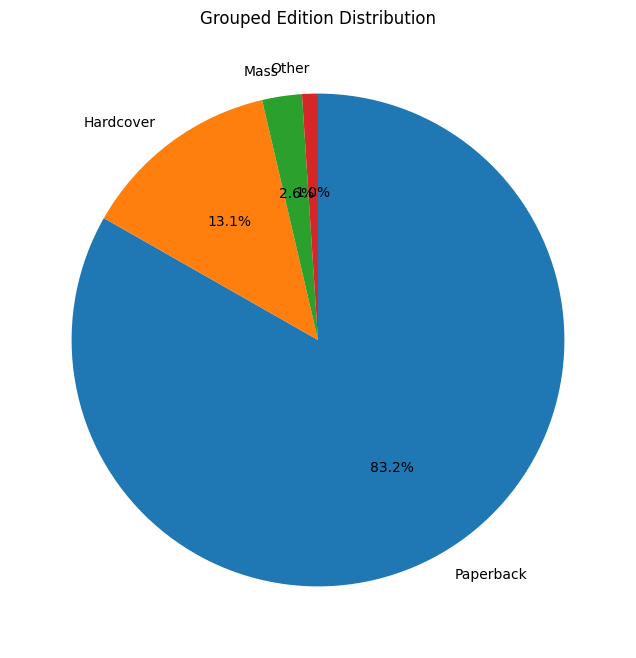

In [1315]:
edition_counts = df['Edition'].value_counts()

# Identify the top 3 editions and group the rest as 'Other'
top_3_editions = edition_counts.nlargest(3).index
df['Edition_Grouped'] = df['Edition'].apply(lambda x: x if x in top_3_editions else 'Other')

# Count the occurrences of each grouped edition
grouped_edition_distribution = df['Edition_Grouped'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(grouped_edition_distribution, labels=grouped_edition_distribution.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Grouped Edition Distribution')
plt.show()

## Feature transformation

In [1316]:
from sklearn.preprocessing import MultiLabelBinarizer


# Function to apply One-Hot Encoding with List Transformation
def one_hot_encode_list_column(df, column_name, separators=[',', '&']):
    mlb = MultiLabelBinarizer()
    for separator in separators:
        df[column_name] = df[column_name].str.replace(separator, ',')
    encoded_values = mlb.fit_transform(df[column_name].str.split(', '))
    df_encoded = pd.DataFrame(encoded_values, columns=mlb.classes_)
    return df_encoded

# Apply One-Hot Encoding for 'Genre'
df_genre_encoded = one_hot_encode_list_column(df, 'Genre')

# Apply One-Hot Encoding for 'BookCategory'
df_book_category_encoded = one_hot_encode_list_column(df, 'BookCategory')

df_author_category_encoded = one_hot_encode_list_column(df, 'Author')

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, df_genre_encoded, df_book_category_encoded], axis=1)

# Drop the original 'Genre' and 'BookCategory' columns
df_encoded = df_encoded.drop(['Genre', 'BookCategory'], axis=1)


In [1317]:
# df_encoded

In [1318]:
# # Example using gensim for Word2Vec
# from gensim.models import Word2Vec

# # Load a pre-trained Word2Vec model
# word2vec_model = Word2Vec.load("path/to/pretrained/word2vec.model")

In [1319]:
import re

def clean_text(text):
    # Remove special characters and numbers
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    return cleaned_text

df['Cleaned_Synopsis'] = df['Synopsis'].apply(clean_text)

In [1320]:
# Convert text to lowercase
df['Cleaned_Synopsis'] = df['Cleaned_Synopsis'].str.lower()

In [1321]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the punkt tokenizer

df['Tokenized_Synopsis'] = df['Cleaned_Synopsis'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /home/alireza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1322]:
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords

stop_words = set(stopwords.words('english'))

df['Tokenized_Synopsis'] = df['Tokenized_Synopsis'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1323]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
synopsis_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Synopsis'])

# Add TF-IDF features to the DataFrame
df_tfidf = pd.DataFrame(synopsis_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df, df_tfidf], axis=1)

In [1324]:
df = df.dropna()

In [1325]:
# df['Cleaned_Title'] = df['Title'].apply(clean_text)

# # Convert text to lowercase
# df['Cleaned_Title'] = df['Cleaned_Title'].str.lower()

In [1326]:
# import nltk
# from nltk.tokenize import word_tokenize

# nltk.download('punkt')  # Download the punkt tokenizer

# df['Tokenized_Title'] = df['Cleaned_Title'].apply(word_tokenize)

In [1327]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Assuming 'Tokenized_Title' is a column containing lists of tokens
# # Convert lists of tokens to strings
# df['Tokenized_Title_Str'] = df['Tokenized_Title'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')

# # Create and fit the TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
# synopsis_tfidf = tfidf_vectorizer.fit_transform(df['Tokenized_Title_Str'])

# # Add TF-IDF features to the DataFrame
# df_tfidf = pd.DataFrame(synopsis_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# df = pd.concat([df, df_tfidf], axis=1)

# # Remove the temporary 'Tokenized_Title_Str' column if needed
# df.drop('Tokenized_Title_Str', axis=1, inplace=True)


In [1328]:
df_encoded = pd.get_dummies(df, columns=['Edition_Grouped'], prefix='Edition_Grouped')
df = df_encoded.dropna()

In [1329]:
df_encoded = pd.get_dummies(df, columns=['Edition'], prefix='Edition')
df = df_encoded.dropna()

In [1330]:
df_encoded = pd.get_dummies(df, columns=['Title'], prefix='Title')
df = df_encoded.dropna()

In [1331]:
df_encoded = pd.get_dummies(df, columns=['Month'], prefix='Month')
df = df_encoded.dropna()

In [1332]:
df = df.drop([ 'Author', 'Synopsis', 'Genre', 'BookCategory', 'Cleaned_Synopsis', 'Tokenized_Synopsis'], axis='columns')
# 'Title', 'Cleaned_Title', 'Tokenized_Title'

In [1276]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Price' is your numerical column
scaler = MinMaxScaler()
df['Reviews'] = scaler.fit_transform(df[['Reviews']])
df['Ratings'] = scaler.fit_transform(df[['Ratings']])
df['Popularity'] = scaler.fit_transform(df[['Popularity']])

In [1333]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
Y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [1334]:
mse_train, mse_test = train(X_train, y_train, X_test, y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

## Modeling

Do not change this part of the code only run it!

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)
    
    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return mse_train, mse_test


In [ ]:
mse_train, mse_test = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

## Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.